# Brain Tumor Detection System

## Introduction
Brain tumors are life-threatening conditions that require early detection for effective treatment. Automating the process using machine learning can help radiologists diagnose tumors faster and more accurately. This project focuses on developing a binary classification system to detect brain tumors from MRI images.
### Problem Statement
The goal is to create a machine learning model that classifies MRI images into two categories: "Yes" (presence of a tumor) and "No" (absence of a tumor). The model is trained using labeled MRI images organized into "train" and "validation" folders.
### Objectives
MRI iamges are preprocessed for training a Convolutional Neural Network(CNN) model for binary classification. The model's perforamance is evaluated using validation data and then deployed with a user friendly interface using gradio.
### Expected Approach
This project is using a supervised learning approach because labeled data is available for training (MRI images are classified as "Yes" or "No").
###  Tools and Techniques
**Libraries:** TensorFlow/Keras, NumPy, Matplotlib, Seaborn, Scikit-learn.<br>
**Visualization:** Matplotlib, Seaborn.<br>
**Deployment:** Gradio for creating an interface.<br>


## Defining Directories of Dataset
The dataset contains MRI images organized in "train" and "validation" folders with subfolders for "Yes" and "No" classes.

In [1]:
import os

In [2]:
base_dir = 'brain_tumor_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training no tumor pictures
train_no_dir = os.path.join(train_dir, 'no')

# Directory with our training with tumor pictures
train_yes_dir = os.path.join(train_dir, 'yes')

# Directory with our validation no tumor pictures
validation_no_dir = os.path.join(validation_dir, 'no')

# Directory with our validation with tumor pictures
validation_yes_dir = os.path.join(validation_dir, 'yes')

Shows the filenames of __yes__ and __no__ tumor __train__ directories.

In [3]:
train_no_fnames = os.listdir(train_no_dir)
print(train_no_fnames[:10])

train_yes_fnames = os.listdir(train_yes_dir)
train_yes_fnames.sort()
print(train_yes_fnames[:10])

['21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '30 no.jpg']
['Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG']


Shows the number of images in each folder.

In [4]:
print('total training no images:', len(os.listdir(train_no_dir)))
print('total training yes images:', len(os.listdir(train_yes_dir)))
print('total validation no images:', len(os.listdir(validation_no_dir)))
print('total validation yes images:', len(os.listdir(validation_yes_dir)))

total training no images: 79
total training yes images: 131
total validation no images: 19
total validation yes images: 24


## Visualizing Dataset
Shows a few pictures to get a better sense of what the tumor and no tumor datasets look like.

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

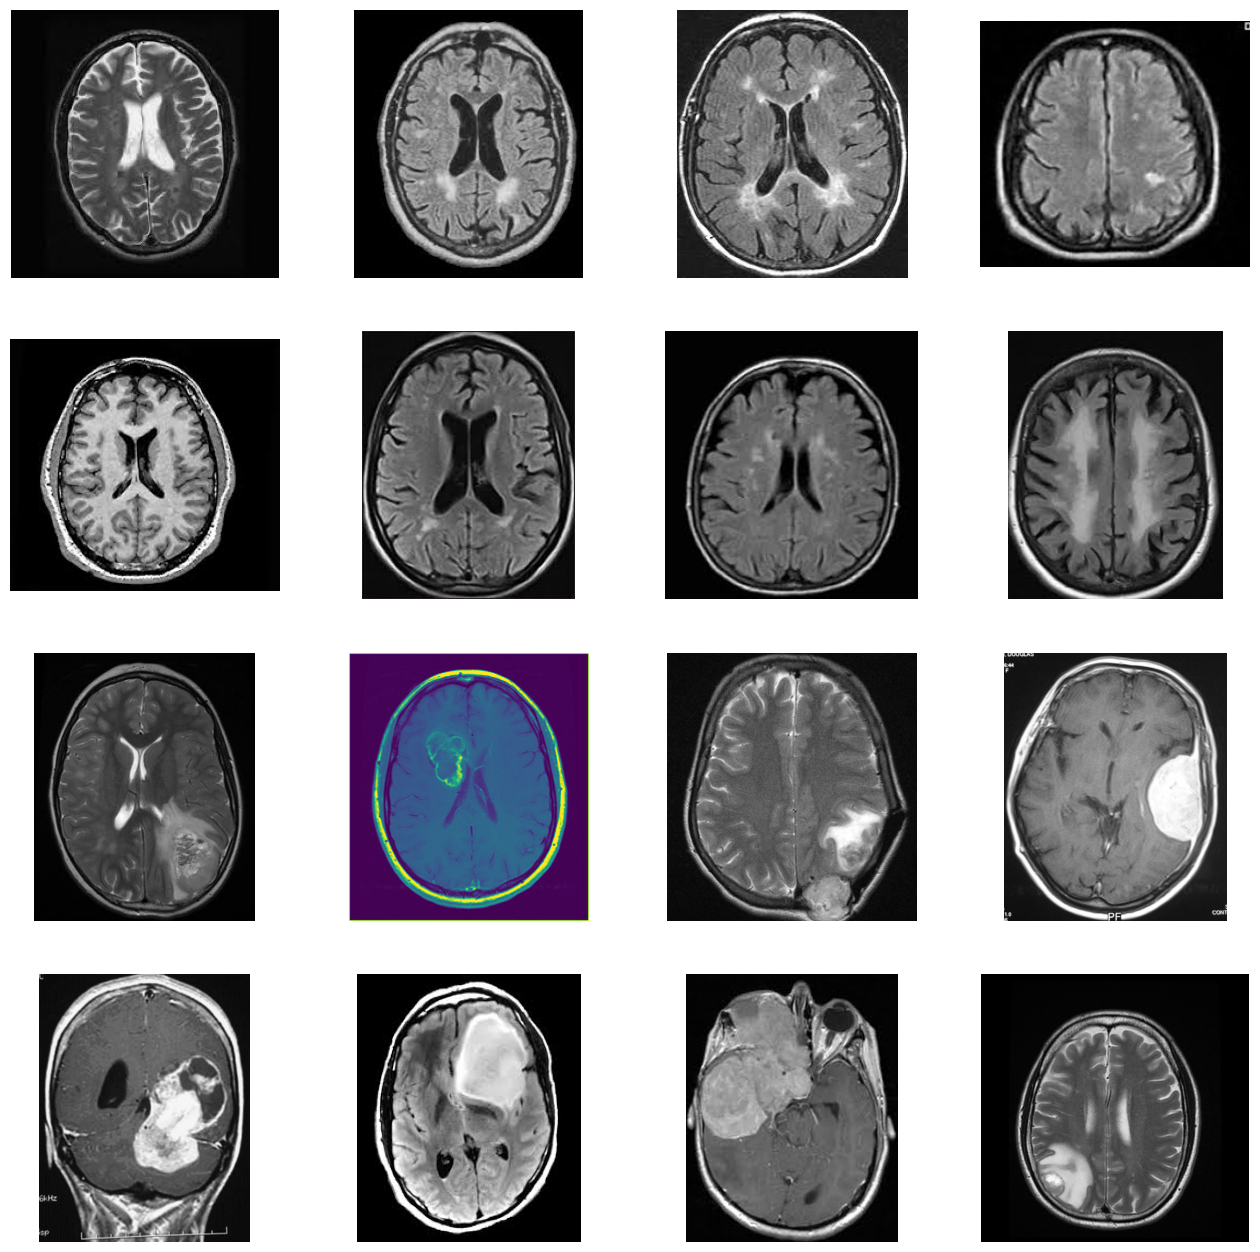

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_no_pix = [os.path.join(train_no_dir, fname) 
                for fname in train_no_fnames[pic_index-8:pic_index]]
next_yes_pix = [os.path.join(train_yes_dir, fname) 
                for fname in train_yes_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_no_pix+next_yes_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building Model
This model has 3 Convolutional2D+Maxpooling2D layers with "ReLu" activation function, Dense layers with ReLU activation and output layer with sigmoid activation. It accepts input image with the shape (150,150,3).

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [8]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [9]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.save('model.keras')

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

## Data Preprocessing
All the train and validation images are rescaled by 1./255 using the rescale parameter from keras.preprocessing.image.ImageDataGenerator class. All images are resized to 150x150.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=10,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 210 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


## Model Training
Model is trained on 210 images in 15 epochs.

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=15,
      validation_data=validation_generator,
      validation_steps=10, 
      verbose=2)

Epoch 1/15


C:\Users\Director Sab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 - 13s - 626ms/step - acc: 0.7100 - loss: 0.7761 - val_acc: 0.7674 - val_loss: 0.5326
Epoch 2/15


C:\Users\Director Sab\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


20/20 - 1s - 30ms/step - acc: 1.0000 - loss: 0.4599 - val_acc: 0.7442 - val_loss: 0.4956
Epoch 3/15
20/20 - 4s - 217ms/step - acc: 0.7600 - loss: 0.5223 - val_acc: 0.7442 - val_loss: 0.4987
Epoch 4/15
20/20 - 1s - 31ms/step - acc: 1.0000 - loss: 0.2893 - val_acc: 0.7442 - val_loss: 0.5403
Epoch 5/15
20/20 - 4s - 180ms/step - acc: 0.7950 - loss: 0.4537 - val_acc: 0.7674 - val_loss: 0.4875
Epoch 6/15
20/20 - 0s - 22ms/step - acc: 1.0000 - loss: 0.3023 - val_acc: 0.8140 - val_loss: 0.4548
Epoch 7/15
20/20 - 3s - 169ms/step - acc: 0.8750 - loss: 0.3483 - val_acc: 0.7209 - val_loss: 0.5378
Epoch 8/15
20/20 - 0s - 22ms/step - acc: 0.7000 - loss: 0.5325 - val_acc: 0.6744 - val_loss: 0.6615
Epoch 9/15
20/20 - 3s - 163ms/step - acc: 0.8800 - loss: 0.2995 - val_acc: 0.7907 - val_loss: 0.7144
Epoch 10/15
20/20 - 0s - 22ms/step - acc: 0.9000 - loss: 0.3754 - val_acc: 0.8372 - val_loss: 0.4080
Epoch 11/15
20/20 - 3s - 172ms/step - acc: 0.8700 - loss: 0.2487 - val_acc: 0.8372 - val_loss: 0.5068
Epoc

## Visualizing Intermediate Representations
Shows the visualization of how an input gets transformed as it goes through the convnet.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


C:\Users\Director Sab\AppData\Local\Temp\ipykernel_9184\3700292127.py:31: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Director Sab\AppData\Local\Temp\ipykernel_9184\3700292127.py:34: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


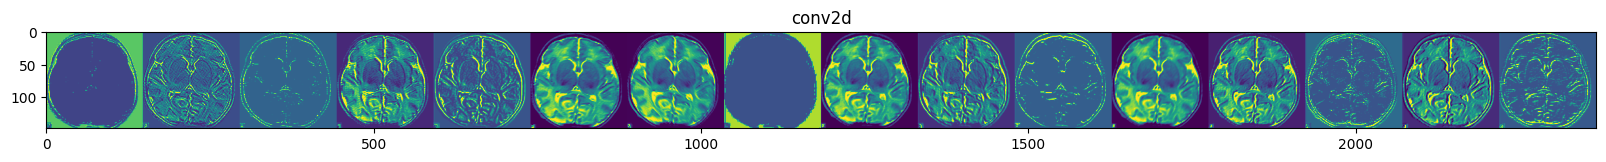

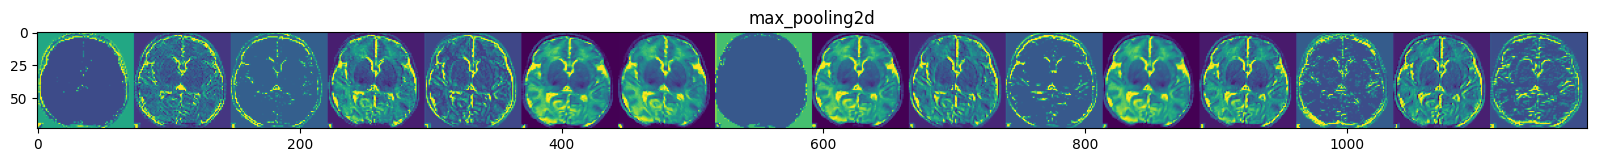

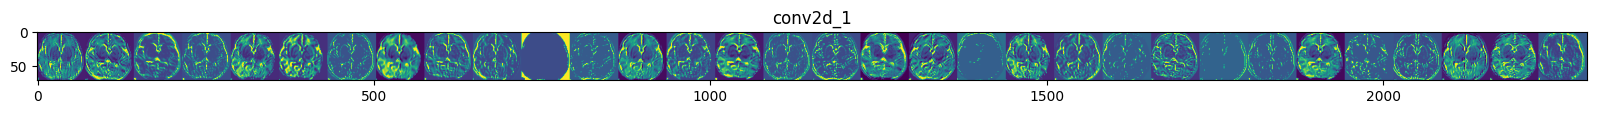

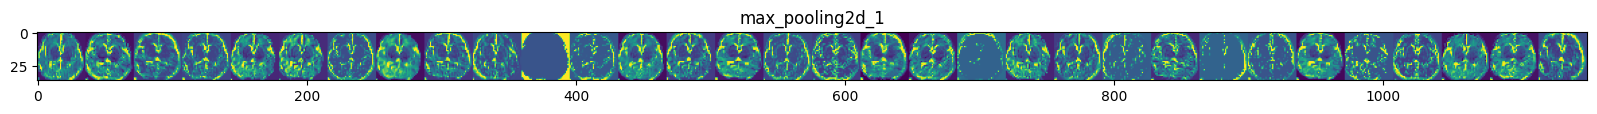

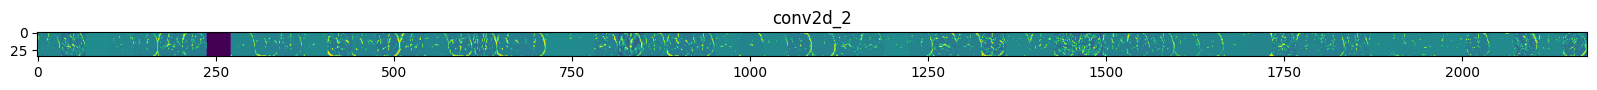

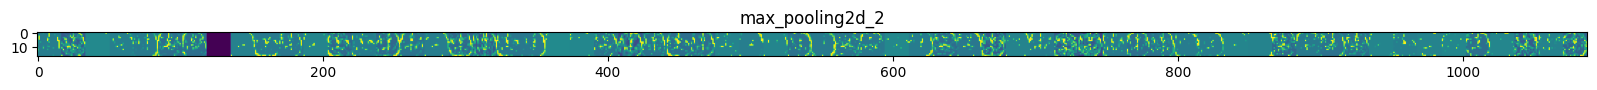

In [17]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

no_img_files = [os.path.join(train_no_dir, f) for f in train_no_fnames]
yes_img_files = [os.path.join(train_yes_dir, f) for f in train_yes_fnames]
img_path = random.choice(no_img_files + yes_img_files)

img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Evaluating the Model
Plotting the training/validation accuracy and loss as collected during training.

Text(0.5, 1.0, 'Training and validation loss')

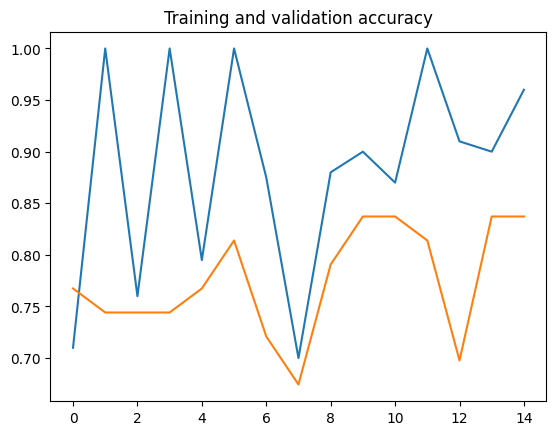

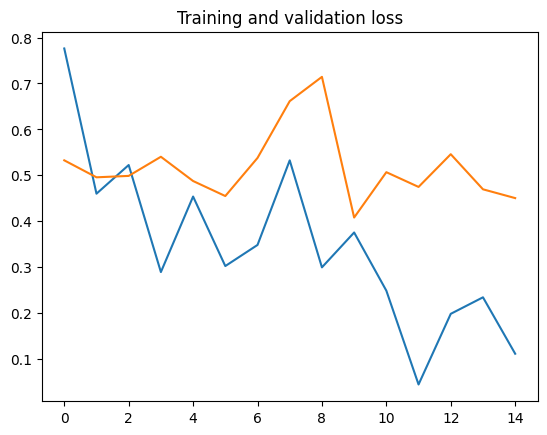

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [20]:
model.save('model.h5')

## Gradio Interface
A 'predict' function is created for gradio interface. Gradio is imported as gr. Interface accepts image input as PIL format and outputs prediction as text.

In [21]:
def predict(image_input):

    img = image_input.resize((150, 150))
    img_array = img_to_array(img) 
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  

    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        return f"Class: 1 (Positive) with confidence {prediction[0][0]:.2f}"
    else:
        return f"Class: 0 (Negative) with confidence {1 - prediction[0][0]:.2f}"


In [22]:
import gradio as gr

In [24]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", image_mode="RGB"), 
    outputs='label',
    title="Image Classification with CNN",
    description="Upload a JPEG image to classify it using the trained CNN model."
)

# Launch the interface
if __name__ == "__main__":
    interface.launch()



* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
